# Plotting

This notebook explains the main plotting functions available for a `WindFarmNetwork (wfn)` instance. There are **five primary plots** which become available in different stages:


- Plots available **immediately after initialization** of the `wfn` object:

    - `wfn.plot_location()`

    - `wfn.plot_navigation_mesh()`

    - `wfn.plot_available_links()`

- Plot available **after running the optimization** (`wfn.optimize()`):

    - `wfn.plot_selected_links()`
    - `wfn.plot()`

For most users, only `wfn.plot_location()` and `wfn.plot()` are typically needed, so we present these plots first.  
The remaining plots are more relevant for **debugging** and **development purposes**, and are discussed in the advanced section below.

👉 [Jump to advanced plotting details](#advanced-plotting-details)

## Plotting `L` and `G`

### Import required modules

In [1]:
from optiwindnet.api import WindFarmNetwork, load_repository

In [2]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

### Create a sample network

> Note: the `load_repository()` functionality of `OptiWindNet` is used to load a prebuilt *Networkx.Graph* of the avaible locations. For more details on this functionality look into the notebook about [Load repositories containing location data](a03_load_repositories.ipynb).

In [3]:
locations = load_repository()
wfn = WindFarmNetwork(L=locations.anholt, cables=[(5, 100), (7, 150)])

### Plot location (L):

`L` contains only the **raw location data**, such as turbine and substation coordinates, borders, and obstacles, **without any links or connections** between nodes.

As a result, `wfn.plot_location()` will appear as an **empty graph**, showing only the individual elements without network links/edges.

This plot is useful to make sure the `WindFarmNetwork()` instance is initialized properly, before running the optimization.

<Axes: >

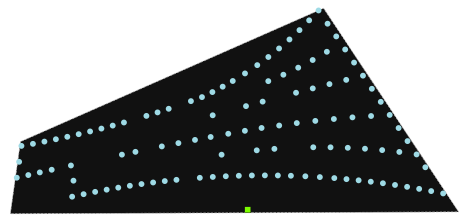

In [4]:
wfn.plot_location()

### Optimize

To plot and visualize the optimized network, an optimization needs to be performed first. For the sake of simplicity, we run the optimization with the default router in `OptiWindNet` (i.e. `Heuristics-Esau_Williams`).

In [5]:
res = wfn.optimize()

### Plot the Optimized Network Graph
The optimized network graph (G) represents the optimized network with actual routes.

Accordingly, `wfn.plot()` displays the routes for selected links in the **optimized network**. The detoured routes are displayed via dashed lines. Detours are the routes created to resolve crossing feeders.

<Axes: >

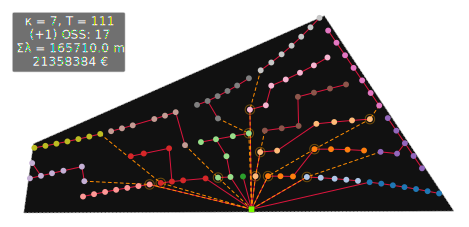

In [6]:
wfn.plot()

### Plot in a pre-existing axes

It is also possible to provide a pre-existing `plt.Axes` object within a matplotlib figure:

<Axes: >

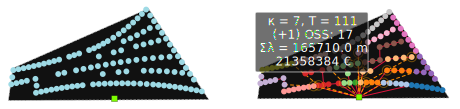

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
fig, (ax1, ax2) = plt.subplots(1, 2, facecolor='none', figsize=(8, 4))

wfn.plot_location(ax=ax1)
wfn.plot(ax=ax2)

### 📊 Plotting Properties

In `OptiWindNet`, users can customize plotting properties such as *node tags* and *legends* to control how turbines and substations are displayed in the visual output.

#### 🏷️ Node Tags

Node tags are used to label turbine and substation nodes in plots and outputs. Tags can be either automatically generated or manually specified.

1. **Automatically Generated Tags**

* These are generated by `OptiWindNet`:
* *Turbines* (non-negative indices):
  Tags follow the order in which turbines appear in the input list.
* *Substations* (negative indices):
  Tags follow the order in which substations appear in the input list with negaive sign in front.

2. **Manually Provided Tags**

    * Tags can be manually defined in either the associated `.yaml` or `.osm.pbf` files. In `OptiWindNet`.
    * These tags are used to label nodes for identification or analysis.


##### ⚙️ Tag Display Logic

The behavior is controlled via the `node_tag` parameter:

| node_tag value | Behavior                                                                                                       |
| -------------------- | ------------------------------------------------------------------------------------------------------- |
| `node_tag=True`           | Automatically generated tags will be displayed on nodes.                                                       |
| `node_tag='load'`           | Tags the nodes by number of turbines routed through node.                                                       |
| `node_tag='any user-defined node attribute'` | Uses custom attributes from the `.yaml` file, if provided. |


##### 🔤 Tag Formatting Guidelines

* Turbines are plotted as *circles*, and substations as *rectangles*.
* The default symbol sizes are optimized for *tags with up to three characters** using the default font size.
  * *Recommendation:* If providing manual tags in `.yaml` files, limit them to *three characters* to ensure proper display and alignment.

##### **Automatically Generated Tags**

These tags are generated by `OptiWindNet`:

* *Turbines* (non-negative indices):
  Tags follow the order in which turbines appear in the input list.
* *Substations* (negative indices):
  Tags follow the order in which substations appear in the input list with negaive sign in front.

<Axes: >

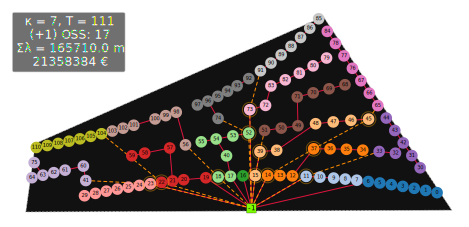

In [8]:
wfn.plot(node_tag=True)

##### **Manually Provided Tags**

Tags can be manually defined in either the associated `.yaml` or `.osm.pbf` files. In `OptiWindNet`, these tags are used to label nodes for identification or analysis.


**• `.yaml` files:**

In `.yaml` files, any text defined *before* the coordinate is interpreted as a node label (`label` attribute).
Example:

```yaml
SUBSTATIONS: |-
  OSS 56°35.748'N 11°09.174'E

TURBINES: |-
  A01 56°30.477'N 11°11.026'E
  A02 56°30.810'N 11°11.078'E
  A03 56°31.144'N 11°11.123'E
  A04 56°31.478'N 11°11.159'E
  A05 56°31.813'N 11°11.187'E
```

Here, `OSS`, `A01`, `A02`, etc., are node labels.


**• `.osm.pbf` files:**

In `.osm.pbf` files, node labels are automatically taken from the `name`, or `ref` attribute (if present) in the OpenStreetMap data.

Example (OSM XML structure):

```xml
<node id="123456" lat="56.5083" lon="11.1870">
  <tag k="name" v="OSS"/>
  <tag k="power" v="substation"/>
</node>
```

In this case, the node will be tagged with the label `"OSS"`.

<Axes: >

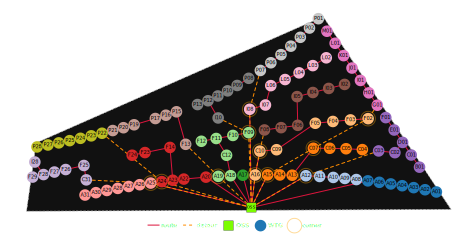

In [9]:
wfn.plot(node_tag='label', infobox=False, legend=True)

The nodes can also be tagged with the amount of power they export towards the substation:
- The load number of a node corresponds to the number of turbines connected through it, indicating how many turbines’ power is routed via that node on the way to the substation.
- The substations will be taged with total number of connected turbines.

<Axes: >

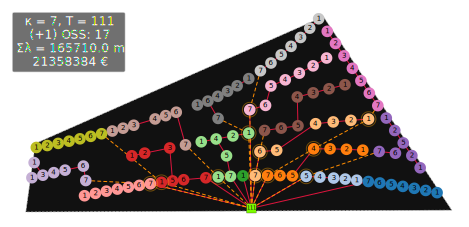

In [10]:
wfn.plot(node_tag='load')

#### Theme of plots

The plots are visualized trying to match the colors used in the figure to the operating system's theme via Python package `darkdetect`. This package detects the system's theme and not JupyterLab's theme, so it may lead no non-ideal results if they do not match.

The example notebooks are created from a dark-themed system, but the figures might have a light background when the notebooks are run on a different computer.

The theme can be enforced programmatically by setting the argument `dark` to `True` or `False`:

<Axes: >

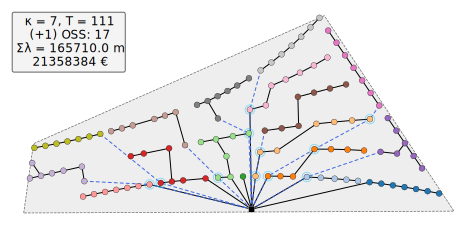

In [11]:
wfn.plot(dark=False)

### Rotated locations

Each location included in `OptiWindNet` has a graph attribute called `landscape_angle`.

In [12]:
wfn.L.graph['landscape_angle']

82

This is the angle that will rotate the site to be in the best orientation for a landscape figure (as opposed to portrait). If the user prefers the orientation to be with the north always up, the argument `landscape` can be used. Alternatively, 'landscape_angle' could be set to 0.

<Axes: >

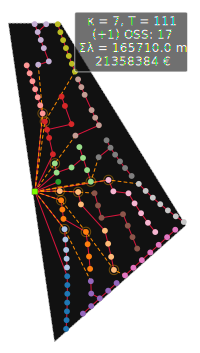

In [13]:
wfn.plot(landscape=False)

<Axes: >

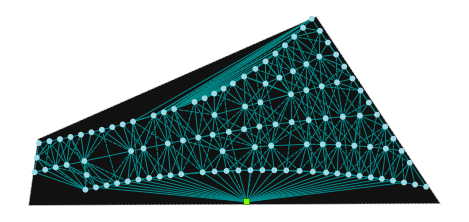

In [14]:
wfn.plot_available_links()

## Advanced Plotting Details


As mentioned at the begining, there are **five primary plots** which become available in different stages:

- Plots available **immediately after initialization** of the `wfn` object:

    - `wfn.plot_location()`
    → Displays turbine and substation locations, borders, and obstacles.

    - `wfn.plot_navigation_mesh()`
    → Displays the triangulated navigation mesh (planar embedding).

    - `wfn.plot_available_links()`
    → Displays available links in the search space.

- Plots available **after running the optimization** (`wfn.optimize()`):

    - `wfn.plot_selected_links()`
    → Displays the **selected links** in the optimized network. A *link* represents an **abstract connection** between two nodes (e.g., turbines and substations), without considering the actual physical path.

    - `wfn.plot()`
    → Displays the **actual cable routes** for the selected links. A **route** is the **physical path** the cable takes through the site, including contours to respect borders/obstacles and **detours** to resolve crossing feeders.

Two plots (`wfn.plot_location()` and `wfn.plot()`) are presented above. The remaining plots (`navigation_mesh`, `available_links`, and `selected_links` which are more relevant for **debugging** and **development purposes**) are discussed in this section.


### Plot navigation mesh

The corresponding graph contains a mesh generated by **constrained Delaunay triangulation**, represented as a planar embedding; a graph that can be embedded in 2D without any crossing.

<Axes: >

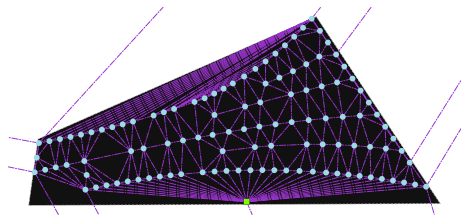

In [15]:
wfn.plot_navigation_mesh()

### Plot Available Links

The corresponding graph contains all **available links in the search space** derived from the **Delaunay triangulation**, and additional **diagonal links**.

The available link graph (A) is the primary graph used by downstream algorithms for **optimization**.

`wfn.plot_available_links()`

This plots displays the available links using different **line styles and colors** to distinguish link types:

* **Line format:**

  * **Solid lines**: direct Delaunay links
  * **Dashed lines**: diagonal or extended links

* **Line color:**

  * in the **dark** theme:
    * **Cyan**: unobstructed (valid) links
    * **Green**: obstructed links (e.g., crossing obstacles)

  * in the **light** theme:
    * **Green**: unobstructed (valid) links
    * **Red**: obstructed links (e.g., crossing obstacles)


<Axes: >

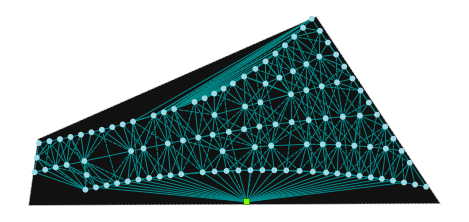

In [16]:
wfn.plot_available_links()

<Axes: >

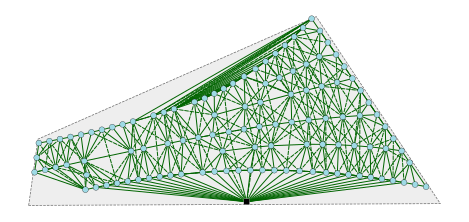

In [17]:
wfn.plot_available_links(dark=False)

### Plot Selected Links

`wfn.plot_selected_links()` displays the **links selected** in the optimized network from among all available links.

<Axes: >

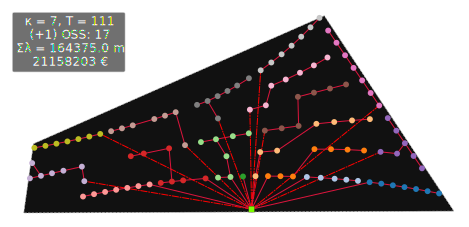

In [18]:
wfn.plot_selected_links()

To clarify the difference between `wfn.plot_selected_links()` and `wfn.plot()`, it's important to distinguish between a *link* and a *route*:

* A **link** is an **abstract connection** between two nodes (e.g., turbine to substation), without considering the actual physical path.
  *(Displayed by `wfn.plot_selected_links()`)*

* A **route** is the **physical path** the cable takes through the site, including contours to respect borders/obstacles and **detours** to resolve crossing-feeders.
  *(Displayed by `wfn.plot()`)*

>For a detailed explanation and visuals, read this paper:
>**To be added: \[link to paper]**